# Winding Creation and Analysis

This document describes methods to create windings either from BCH/BATCH files or from scratch.

In [1]:
import femagtools.bch
import femagtools.plot
import femagtools.windings
import matplotlib.pyplot as plt

Load a BATCH file and create the winding:

In [2]:
bch = femagtools.bch.read('PM_270_L8_001.BATCH')
w = femagtools.windings.Windings(bch)

Plot the magnetomotive force

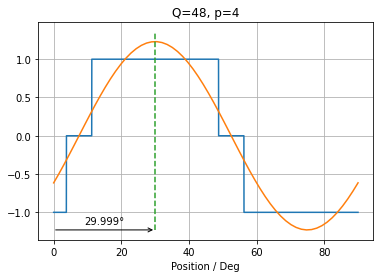

In [3]:
f=w.mmf()
title = f"Q={w.Q}, p={w.p}"
femagtools.plot.mmf(f, title)

Plot the MMF harmonics

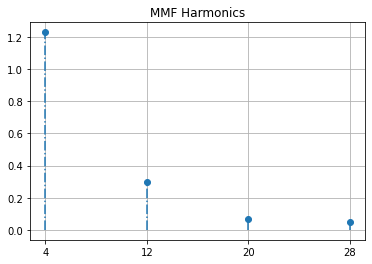

In [4]:
femagtools.plot.mmf_fft(f)

Show the winding properties:

In [5]:
w.windings

{1: {'dir': [1, 1],
  'N': [9.0, 9.0],
  'R': [0.0994546, 0.0994546],
  'PHI': [3.75, 11.25]},
 2: {'dir': [1, 1],
  'N': [9.0, 9.0],
  'R': [0.0994546, 0.0994546],
  'PHI': [33.75, 41.25]},
 3: {'dir': [-1, -1],
  'N': [9.0, 9.0],
  'R': [0.0994546, 0.0994546],
  'PHI': [18.75, 26.25]}}

Show the slots of phase 3:

In [6]:
w.slots(2)

array([[ 5,  6, 11, 12],
       [17, 18, 23, 24],
       [29, 30, 35, 36],
       [41, 42, 47, 48]])

Show the slots and the winding directions of all phases:

In [7]:
w.zoneplan()

[[[1, 2, -7, -8], [5, 6, -11, -12], [-3, -4, 9, 10]], []]

Plot the zone plan:

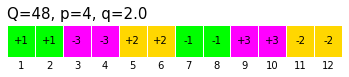

In [8]:
femagtools.plot.zoneplan(w)

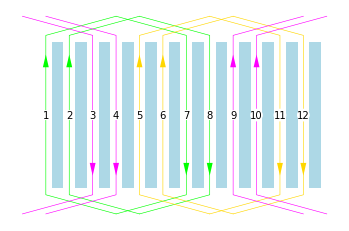

In [9]:
femagtools.plot.windings(w)

Create a single layer 3-phase winding with 12 slots, 2 pole pairs from scratch:

In [10]:
w1 = femagtools.windings.Windings({'Q':12, 'p':2, 'm':3})

Show the winding properties and note the default radius and winding turns values:

In [11]:
w1.windings

{1: {'dir': [1, -1], 'N': [1, 1], 'R': [1, 1], 'PHI': [15.0, 105.0]},
 2: {'dir': [1, -1], 'N': [1, 1], 'R': [1, 1], 'PHI': [75.0, 165.0]},
 3: {'dir': [-1, 1], 'N': [1, 1], 'R': [1, 1], 'PHI': [45.0, 135.0]}}

In [12]:
w1.slots(3)

array([[ 2,  5],
       [ 8, 11]])

Plot the magnetomotive force:

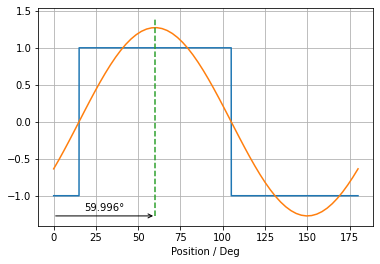

In [13]:
femagtools.plot.mmf(w1.mmf(), '')

Show the zoneplan:

In [14]:
w1.zoneplan()

([[1, -4], [3, -6], [-2, 5]], [])

This is a  2-layer, 3-phase winding with 90 slots and 12 pole pairs:

In [15]:
w2 = femagtools.windings.Windings({'Q':90, 'p':12, 'm':3, 'l':2})

In [16]:
w2.windings

{1: {'dir': [1, 1, 1, -1, -1, -1, 1, 1, -1, -1],
  'N': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'R': [1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
  'PHI': [2.0, 2.0, 6.0, 14.0, 18.0, 18.0, 30.0, 34.0, 46.0, 50.0]},
 2: {'dir': [1, 1, -1, -1, 1, 1, 1, -1, -1, -1],
  'N': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'R': [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
  'PHI': [10.0, 14.0, 26.0, 30.0, 42.0, 42.0, 46.0, 54.0, 58.0, 58.0]},
 3: {'dir': [-1, -1, 1, 1, 1, -1, -1, -1, 1, 1],
  'N': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  'R': [0, 1, 1, 0, 1, 0, 1, 0, 0, 1],
  'PHI': [6.0, 10.0, 22.0, 22.0, 26.0, 34.0, 38.0, 38.0, 50.0, 54.0]}}

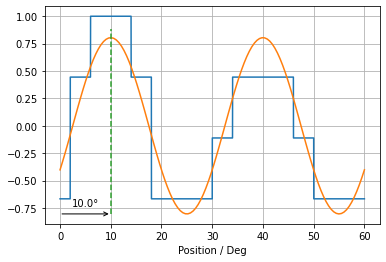

In [17]:
femagtools.plot.mmf(w2.mmf())

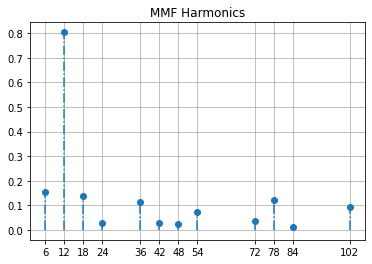

In [18]:
femagtools.plot.mmf_fft(w2.mmf())

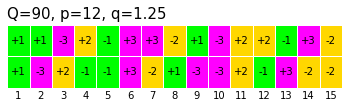

In [19]:
femagtools.plot.zoneplan(w2)

Draw the coil diagram:

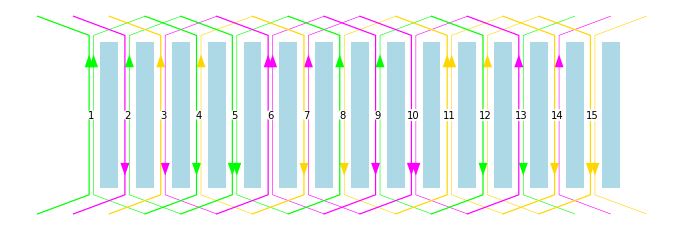

In [20]:
plt.figure(figsize=(12,4))
femagtools.plot.winding(w2)

A 2-layer winding with coil width:

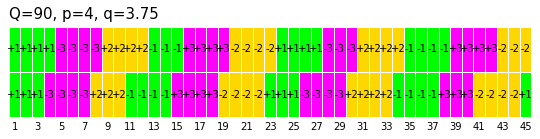

In [21]:
plt.figure(figsize=(12,2))
w3 = femagtools.windings.Windings({'Q':90, 'p':4, 'm':3, 'l':2, 'coilwidth':10})
femagtools.plot.zoneplan(w3)

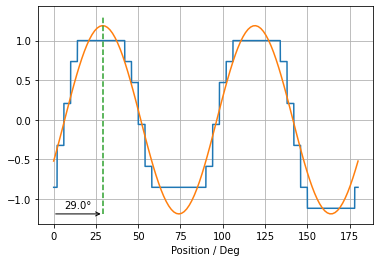

In [22]:
femagtools.plot.mmf(w3.mmf())

This is an example with 168 slots from a BATCH file:

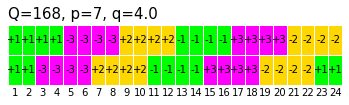

In [23]:
bch = femagtools.bch.read('xxx.BCH')
w4 = femagtools.windings.Windings(bch)
femagtools.plot.zoneplan(w4)

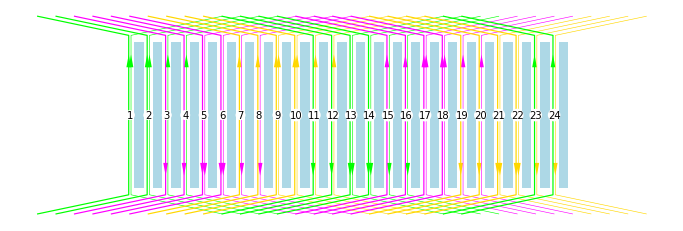

In [24]:
plt.figure(figsize=(12,4))
femagtools.plot.winding(w4)

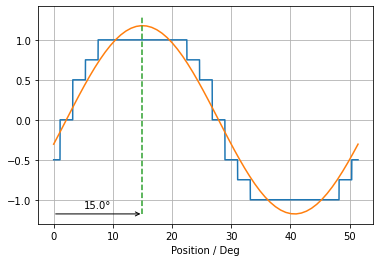

In [25]:
femagtools.plot.mmf(w4.mmf())

The same example created directly:

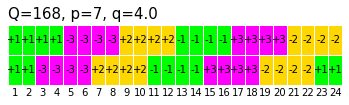

In [26]:
w5 = femagtools.windings.Windings(dict(Q=168, p=7, m=3, l=2, coilwidth=10))
femagtools.plot.zoneplan(w5)

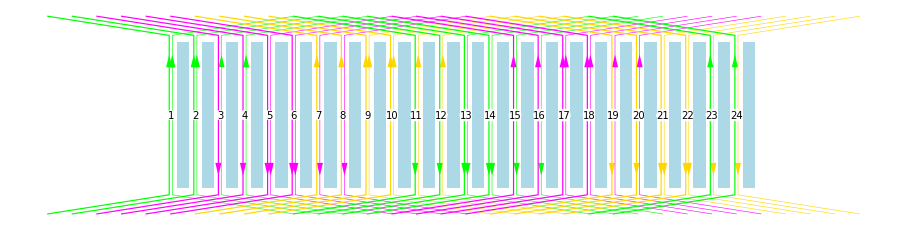

In [27]:
plt.figure(figsize=(16,4))
femagtools.plot.winding(w5)

Here is another example:

In [28]:
bch = femagtools.bch.read('PM_130_L10.BATCH')
w6 = femagtools.windings.Windings(bch)

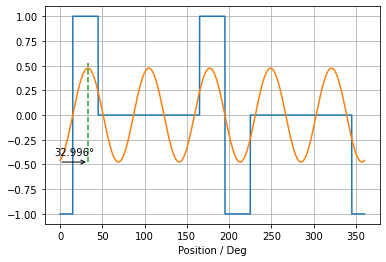

In [29]:
f = w6.mmf()
femagtools.plot.mmf(f)

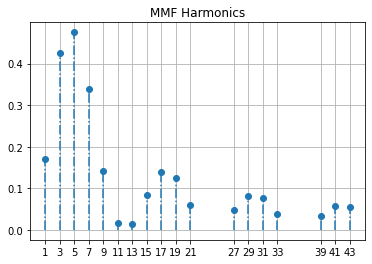

In [30]:
femagtools.plot.mmf_fft(f)

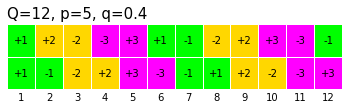

In [31]:
femagtools.plot.zoneplan(w6)

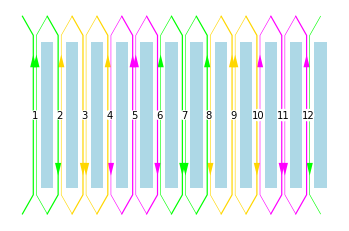

In [32]:
femagtools.plot.windings(w6)